In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Newone.csv")

In [4]:
df.drop(["Unnamed: 0"], axis = 1, inplace= True)
df


,Air Conditioning,Space Heating,Water Heating,Lighting,Refrigerators,TV,Clothes Dryer,Oven,Microwave,Dishwasher,Clother washer,Other,temperature
0,0.157649,0.231343,0.127798,0.096082,0.652983,0.652983,0.326492,0.013060,0.010261,0.005597,0.003731,0.020802,36.14
1,0.157902,0.231715,0.128004,0.096236,0.654033,0.654033,0.327017,0.013081,0.010278,0.005606,0.003737,0.020836,36.14
2,0.157477,0.231091,0.127659,0.095977,0.652272,0.652272,0.326136,0.013045,0.010250,0.005591,0.003727,0.020780,36.14
3,0.172726,0.253468,0.140021,0.105271,0.715435,0.715435,0.357717,0.014309,0.011243,0.006132,0.004088,0.022792,36.14
4,0.192559,0.282571,0.156098,0.117358,0.797580,0.797580,0.398790,0.015952,0.012533,0.006836,0.004558,0.025409,36.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,0.270608,0.397106,0.219369,0.164927,1.120863,1.120863,0.560432,0.022417,0.017614,0.009607,0.006405,0.035708,35.12
503906,0.270287,0.396635,0.219109,0.164731,1.119533,1.119533,0.559767,0.022391,0.017593,0.009596,0.006397,0.035665,35.12
503907,0.325201,0.477218,0.263625,0.198199,1.346987,1.346987,0.673493,0.026940,0.021167,0.011546,0.007697,0.042911,35.12
503908,0.334316,0.490594,0.271013,0.203755,1.384740,1.384740,0.692370,0.027695,0.021760,0.011869,0.007913,0.044114,35.12


In [5]:
df['cost'] = df.iloc[:, :12].sum(axis = 1)*24

dat = pd.read_csv("HomeC.csv")


<ipython-input-5-b3de48f3df04>:3: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("HomeC.csv")


In [6]:
dat = dat.iloc[:-1, :]
dat['time'] = pd.to_datetime(dat['time'], unit='s')
dat['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(dat),  freq='min'))
dat = dat.set_index('time')
df['time'] = dat.index
df.set_index('time', inplace = True)


In [7]:
dfH = df.resample('H').mean()
dfD =dfH.resample('D').sum()
dfD = dfD.astype('float')


In [8]:
new2 = pd.DataFrame(dfD.T[dfD.T.index == 'cost'])
new2.T.min()

contr = dfD.T/dfD.cost*100*24
contr


time,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16
Air Conditioning,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,...,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931,6.857931
Space Heating,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,...,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710,10.063710
Water Heating,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,...,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388,5.559388
Lighting,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,...,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686,4.179686
Refrigerators,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,...,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632
TV,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,...,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632,28.405632
Clothes Dryer,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,...,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816,14.202816
Oven,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,...,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113,0.568113
Microwave,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,...,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374,0.446374
Dishwasher,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,...,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477,0.243477


In [9]:
dfD.index = dfD.index.astype('datetime64[ns]')

dfD['month'] = dfD.index.month

#enter month
mon = 11


In [10]:
dfM = dfD.resample('M').mean()


dfM['money'] = dfM.cost*0.10
dfM


,Air Conditioning,Space Heating,Water Heating,Lighting,Refrigerators,TV,Clothes Dryer,Oven,Microwave,Dishwasher,Clother washer,Other,temperature,cost,month,money
time,,,,,,,,,,,,,,,,
2016-01-31,4.202844,6.167487,3.407039,2.561497,17.408230,17.408230,8.704115,0.348165,0.273558,0.149213,0.099476,0.554576,684.680183,1470.826305,1.0,147.082630
2016-02-29,4.036384,5.923214,3.272098,2.460045,16.718750,16.718750,8.359375,0.334375,0.262723,0.143304,0.095536,0.532612,731.336103,1412.571949,2.0,141.257195
2016-03-31,3.091690,4.536917,2.506281,1.884284,12.805815,12.805815,6.402908,0.256116,0.201234,0.109764,0.073176,0.407957,1018.161194,1081.967001,3.0,108.196700
2016-04-30,2.785012,4.086881,2.257672,1.697374,11.535551,11.535551,5.767776,0.230711,0.181273,0.098876,0.065917,0.367490,1116.269367,974.642015,4.0,97.464202
2016-05-31,2.321555,3.406779,1.881971,1.414912,9.615909,9.615909,4.807954,0.192318,0.151107,0.082422,0.054948,0.306335,1473.711247,812.450875,5.0,81.245087
2016-06-30,2.175715,3.192765,1.763745,1.326027,9.011836,9.011836,4.505918,0.180237,0.141615,0.077244,0.051496,0.287091,1633.082678,761.412621,6.0,76.141262
2016-07-31,4.739916,6.955617,3.842417,2.888825,19.632789,19.632789,9.816395,0.392656,0.308515,0.168281,0.112187,0.625445,1756.271839,1658.779961,7.0,165.877996
2016-08-31,5.613929,8.238191,4.550936,3.421507,23.252959,23.252959,11.626479,0.465059,0.365404,0.199311,0.132874,0.740773,1741.430946,1964.649131,8.0,196.464913
2016-09-30,3.000266,4.402757,2.432168,1.828565,12.427138,12.427138,6.213569,0.248543,0.195284,0.106518,0.071012,0.395893,1438.973583,1049.972412,9.0,104.997241


In [15]:
new_value = float(input("Zəhmət olmasa, növbəti ay üçün nəzərdə tutduğunuz sərfiyyat xərcini qeyd edin:"))

Zəhmət olmasa, növbəti ay üçün nəzərdə tutduğunuz sərfiyyat xərcini qeyd edin:100


In [21]:
#percentage
perc = 1 -  new_value/dfM.iloc[:,-1][-2]


In [22]:
monthly = dfM.T
monthly.drop(['cost', 'temperature', 'money', 'month'], axis = 0, inplace = True)
monthly['new'] = monthly.sum(axis = 1)
monthly.nlargest(6, 'new')


time,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00,2016-06-30 00:00:00,2016-07-31 00:00:00,2016-08-31 00:00:00,2016-09-30 00:00:00,2016-10-31 00:00:00,2016-11-30 00:00:00,2016-12-31 00:00:00,new
Refrigerators,17.408230,16.718750,12.805815,11.535551,9.615909,9.011836,19.632789,23.252959,12.427138,11.374221,14.162010,14.669607,172.614815
TV,17.408230,16.718750,12.805815,11.535551,9.615909,9.011836,19.632789,23.252959,12.427138,11.374221,14.162010,14.669607,172.614815
Clothes Dryer,8.704115,8.359375,6.402908,5.767776,4.807954,4.505918,9.816395,11.626479,6.213569,5.687110,7.081005,7.334803,86.307407
Space Heating,6.167487,5.923214,4.536917,4.086881,3.406779,3.192765,6.955617,8.238191,4.402757,4.029724,5.017398,5.197232,61.154963
Air Conditioning,4.202844,4.036384,3.091690,2.785012,2.321555,2.175715,4.739916,5.613929,3.000266,2.746062,3.419114,3.541662,41.674148
Water Heating,3.407039,3.272098,2.506281,2.257672,1.881971,1.763745,3.842417,4.550936,2.432168,2.226098,2.771708,2.871052,33.783185


In [23]:
suggested = dfH[dfH.index.month == 11]

In [24]:
dfH['day'] = dfH.index.day

In [25]:
for i in dfD.TV.nlargest(9).index.day.values:
    suggested['TV'][(suggested.index.day == i) & (suggested.index.month == mon)] *= 0.5



<ipython-input-25-30e67b7395d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suggested['TV'][(suggested.index.day == i) & (suggested.index.month == mon)] *= 0.5


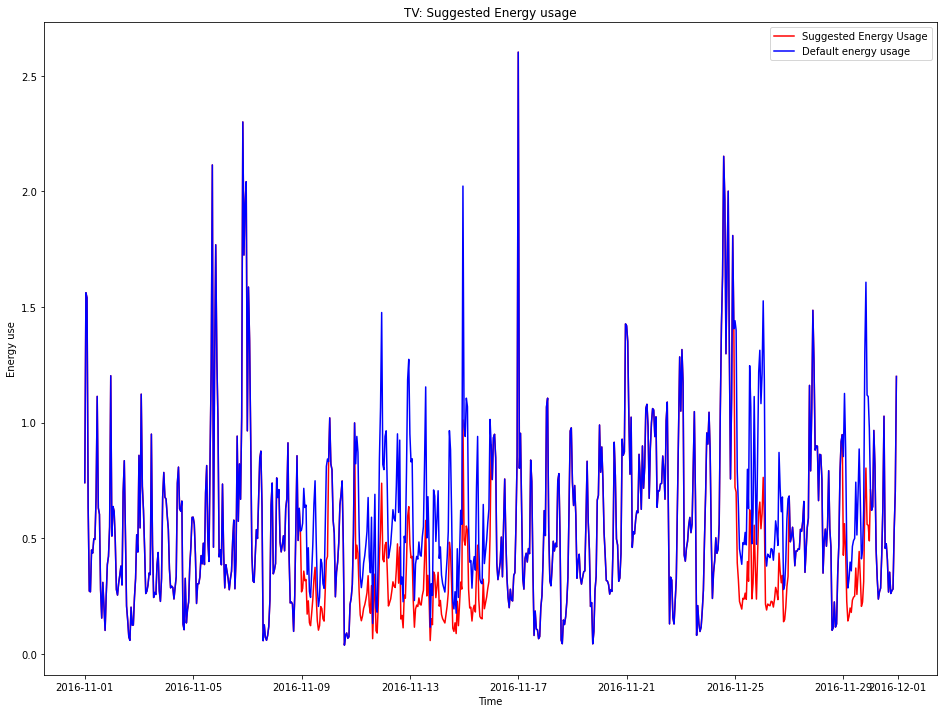

In [27]:
plt.figure(figsize= (16,12))
plt.plot(suggested.index[suggested.index.month==11], suggested[suggested.index.month==11].TV, c='r', label = 'Suggested Energy Usage')
plt.plot(dfH.index[dfH.index.month==11], dfH[dfH.index.month==11].TV, c= 'b', label = 'Default energy usage')
plt.xlabel("Time")
plt.ylabel("Energy use")
plt.title("TV: Suggested Energy usage")
plt.legend()


In [28]:
for i in dfD['Air Conditioning'].nlargest(9).index.day.values:
    suggested['Air Conditioning'][(suggested.index.day == i) & (suggested.index.month == mon)] *= 0.45
    


<ipython-input-28-981d79a0aa07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suggested['Air Conditioning'][(suggested.index.day == i) & (suggested.index.month == mon)] *= 0.45


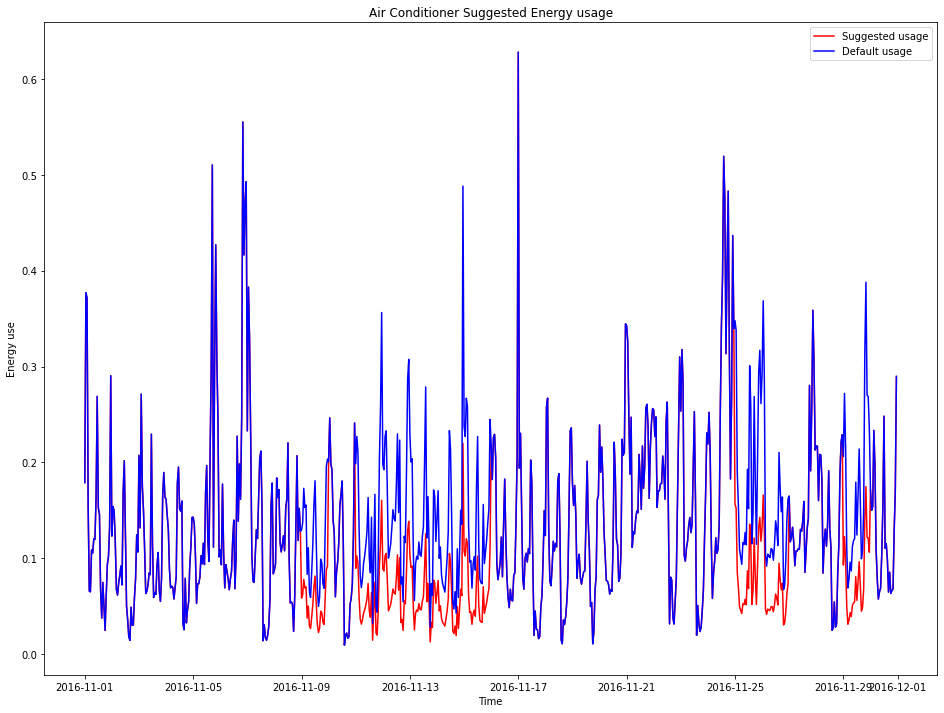

In [29]:
plt.figure(figsize= (16,12))



plt.plot(suggested.index[suggested.index.month==11], suggested[suggested.index.month==11]['Air Conditioning'], c='r', label='Suggested usage')
plt.plot(dfH.index[dfH.index.month==11], dfH[dfH.index.month==11]['Air Conditioning'], c= 'b', label = 'Default usage')
plt.xlabel("Time")
plt.ylabel("Energy use")
plt.title("Air Conditioner Suggested Energy usage")
plt.legend()
